In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [4]:
with open("results/transfer_results_test_mscorpus_risec_1_0_amr_residual.csv") as f:
    results_df = pd.read_csv(f)

results_df.head(10)

,Unnamed: 0,ent1_name,ent2_name,ent1_start,ent2_start,ent1_end,ent2_end,ent1_amr,ent2_amr,sent,labels,predictions
0,0,cut,chicken breasts,3,7,6,22,1,2,1) Cut chicken breasts into 1 inch strips.,Arg_PPT,Arg_DIR
1,1,cut,1 inch strips,3,28,6,41,1,3,1) Cut chicken breasts into 1 inch strips.\n2)...,Arg_PRD,Arg_PRD
2,2,place,cut,46,3,51,6,2,1,1) Cut chicken breasts into 1 inch strips.\n2)...,Arg_PPT,ArgM_SIM
3,3,place,a medium bowl,4,13,9,26,1,2,\n2) Place in a medium bowl with desired marin...,Arg_GOL,Arg_PRD
4,4,marinate,place,54,4,62,9,1,1,\n2) Place in a medium bowl with desired marin...,Arg_PPT,Arg_PAG
5,5,marinate,the refrigerator,54,66,62,82,1,1,\n2) Place in a medium bowl with desired marin...,ArgM_LOC,ArgM_LOC
6,6,marinate,at least 30 minutes,54,87,62,106,1,3,\n2) Place in a medium bowl with desired marin...,ArgM_TMP,ArgM_MNR
7,7,preheat,oven,4,12,11,16,1,1,\n3) Preheat oven to 350 degrees F (175 degree...,Arg_PPT,ArgM_LOC
8,8,preheat,350 degrees f,4,20,11,33,1,1,\n3) Preheat oven to 350 degrees F (175 degree...,ArgM_MNR,Arg_GOL
9,9,preheat,175 degrees c,4,35,11,48,1,0,\n3) Preheat oven to 350 degrees F (175 degree...,ArgM_MNR,Arg_GOL


In [5]:
results_df.shape

(2213, 12)

In [6]:
e1_present = results_df["ent1_amr"].astype(bool)
e2_present = results_df["ent2_amr"].astype(bool)
either_present = e1_present | e2_present
both_present = e1_present & e2_present
neither_present = (~e1_present) & (~e2_present)

In [7]:
(e1_present.astype(int) + e2_present.astype(int) - both_present.astype(int) + neither_present.astype(int)).value_counts()

1    2213
dtype: int64

In [8]:
results_df["ent2_amr"].astype(bool).mean()

0.8621780388612743

In [9]:
(results_df["ent1_amr"].astype(bool) & results_df["ent2_amr"].astype(bool)).mean()

0.7948486217803886

In [11]:
f1_score(results_df["labels"], results_df["predictions"], average="macro")

0.2054347166519215

In [12]:
f1_score(results_df[neither_present]["labels"], results_df[neither_present]["predictions"], average="macro")

0.13711432126724804

In [13]:
f1_score(results_df[both_present]["labels"], results_df[both_present]["predictions"], average="macro")

0.20820758093531586

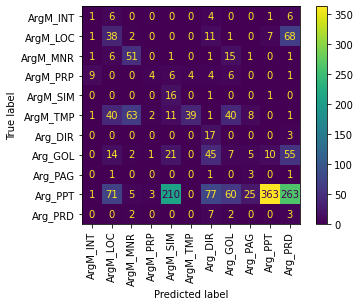

In [17]:

ConfusionMatrixDisplay.from_predictions(results_df[both_present]["labels"], results_df[both_present]["predictions"], xticks_rotation="vertical")


In [18]:
results_df["labels"].value_counts()

Arg_PPT     1368
ArgM_TMP     237
Arg_GOL      199
ArgM_LOC     151
ArgM_MNR     116
ArgM_PRP      44
Arg_DIR       29
ArgM_INT      23
ArgM_SIM      21
Arg_PRD       17
Arg_PAG        8
Name: labels, dtype: int64

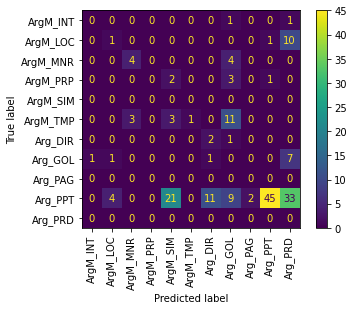

In [20]:
ConfusionMatrixDisplay.from_predictions(results_df[neither_present]["labels"], results_df[neither_present]["predictions"], xticks_rotation="vertical")


In [21]:
f1_score(results_df["labels"], results_df["predictions"], average="micro")

0.29778581111613195

In [22]:
labels = sorted(results_df["labels"].unique())

In [23]:
list(zip(labels, f1_score(results_df[both_present]["labels"], results_df[both_present]["predictions"], average=None)))

[('ArgM_INT', 0.0625),
 ('ArgM_LOC', 0.25),
 ('ArgM_MNR', 0.504950495049505),
 ('ArgM_PRP', 0.1818181818181818),
 ('ArgM_SIM', 0.11307420494699646),
 ('ArgM_TMP', 0.3132530120481928),
 ('Arg_DIR', 0.1798941798941799),
 ('Arg_GOL', 0.04810996563573883),
 ('Arg_PAG', 0.125),
 ('Arg_PPT', 0.49726027397260275),
 ('Arg_PRD', 0.014423076923076924)]

In [24]:
list(zip(labels, f1_score(results_df[either_present]["labels"], results_df[either_present]["predictions"], average=None)))

[('ArgM_INT', 0.057142857142857134),
 ('ArgM_LOC', 0.24260355029585795),
 ('ArgM_MNR', 0.5454545454545454),
 ('ArgM_PRP', 0.16326530612244897),
 ('ArgM_SIM', 0.09944751381215469),
 ('ArgM_TMP', 0.3082706766917293),
 ('Arg_DIR', 0.20909090909090908),
 ('Arg_GOL', 0.06722689075630252),
 ('Arg_PAG', 0.13793103448275865),
 ('Arg_PPT', 0.47215496368038745),
 ('Arg_PRD', 0.01282051282051282)]

In [25]:
list(zip(sorted(results_df[neither_present]["labels"].unique()), f1_score(results_df[neither_present]["labels"], results_df[neither_present]["predictions"], average=None)))

[('ArgM_INT', 0.0),
 ('ArgM_LOC', 0.1111111111111111),
 ('ArgM_MNR', 0.5333333333333333),
 ('ArgM_PRP', 0.0),
 ('ArgM_TMP', 0.0),
 ('Arg_DIR', 0.10526315789473684),
 ('Arg_GOL', 0.23529411764705882),
 ('Arg_PPT', 0.0)]

In [26]:
results_df["labels"].value_counts()

Arg_PPT     1368
ArgM_TMP     237
Arg_GOL      199
ArgM_LOC     151
ArgM_MNR     116
ArgM_PRP      44
Arg_DIR       29
ArgM_INT      23
ArgM_SIM      21
Arg_PRD       17
Arg_PAG        8
Name: labels, dtype: int64

In [27]:
f1_score(results_df[neither_present]["labels"], results_df[neither_present]["predictions"], average="micro")

0.28804347826086957

In [28]:
f1_score(results_df[either_present]["labels"], results_df[either_present]["predictions"], average="micro")

0.29866929521931984

In [29]:
f1_score(results_df[both_present]["labels"], results_df[both_present]["predictions"], average="micro")

0.30812961910176234